# **TUIA - Aprendizaje Automático 1 - 2024**

---

**Materia:** Aprendizaje Automático I (IA41)

**Año académico:** 2024

**Período lectivo:** 2° cuatrimestre

**Integrantes:**
- Britos, Julián Francisco
- Menescaldi, Brisa
- Rodriguez y Barros, Francisco 

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://github.com/franciscoryb1/AA1-TUIA-RodriguezYBarros-Menescaldi-Britos/blob/main/TP.ipynb)

# Librerías

Python 3.11.6

numpy   1.26.2

pandas  2.2.2

matplotlib  3.8.2

plotly  5.21.0

scikit-learn    1.5.0

seaborn 0.13.2


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import (
    LinearRegression,
    Ridge,
    Lasso,
    ElasticNet,
    RidgeCV,
    ElasticNetCV,
    LassoCV,
    SGDRegressor,
    LogisticRegression
)
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
     mean_squared_error, 
     r2_score, 
     mean_absolute_error,
     classification_report, 
     confusion_matrix,
     ConfusionMatrixDisplay,
     balanced_accuracy_score, 
     log_loss,
     roc_curve, 
     roc_auc_score, 
     auc,
     accuracy_score
)

from sklearn.model_selection import GridSearchCV, KFold, StratifiedKFold, cross_val_score, train_test_split

# Carga de datos

In [2]:
file_path = "house-prices-tp.csv"
df = pd.read_csv(file_path, sep=",", engine="python")

**Características de entrada en orden:**

1) CRIM: tasa de criminalidad per cápita por ciudad
2) ZN: proporción de terrenos residenciales zonificados para lotes de más de 25,000 pies cuadrados
3) INDUS: proporción de acres de negocios no minoristas por ciudad
4) CHAS: variable dummy del río Charles (1 si el tramo limita con el río; 0 de lo contrario)
5) NOX: concentración de óxidos de nitrógeno (partes por 10 millones) [parts/10M]
6) RM: número promedio de habitaciones por vivienda
7) AGE: proporción de unidades ocupadas por sus propietarios construidas antes de 1940
8) DIS: distancias ponderadas a cinco centros de empleo de Boston
9) RAD: índice de accesibilidad a las autopistas radiales
10) TAX: tasa de impuesto sobre la propiedad a valor completo por $10,000 [$/10k]
11) PTRATIO: proporción alumno-maestro por ciudad
12) B: El resultado de la ecuación B=1000(Bk - 0.63)^2 donde Bk es la proporción de negros por ciudad
13) LSTAT: % de población de menor estatus socioeconómico

**Variable de salida (target):**

14) MEDV: Valor mediano de las viviendas ocupadas por sus propietarios en miles de dólares [k$]


# Análisis estadístico descriptivo

## Exploración de los datos

In [10]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.071510,0.000000,4.490000,0.0,0.449,6.121000,56.8,3.747600,3.000000,247.000000,18.500000,395.150000,8.440000,22.200000
1,0.082650,0.000000,13.920000,0.0,0.437,6.127000,18.4,5.502700,4.000000,289.000000,16.000000,396.900000,8.580000,23.900000
2,0.128160,12.500000,6.070000,0.0,0.409,5.885000,33.0,6.498000,4.000000,345.000000,18.900000,396.900000,8.790000,20.900000
3,0.088730,21.000000,5.640000,0.0,0.439,5.963000,45.7,6.814700,4.000000,243.000000,16.800000,395.560000,13.450000,19.700000
4,0.114320,0.000000,8.560000,0.0,0.520,6.781000,71.3,2.856100,5.000000,384.000000,20.900000,395.580000,7.670000,26.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
551,0.082440,30.000000,4.930000,0.0,0.428,6.481000,18.5,6.189900,6.000000,300.000000,16.600000,379.410000,6.360000,23.700000
552,0.475470,0.000000,9.900000,0.0,0.544,6.113000,58.8,4.001900,4.000000,304.000000,18.400000,396.230000,12.730000,21.000000
553,0.249800,0.000000,21.890000,0.0,0.624,5.857000,98.2,1.668600,4.000000,437.000000,21.200000,392.040000,21.320000,13.300000
554,32.504013,6.528591,8.937346,1.0,NaN,4.016588,NaN,5.243777,20.416908,197.236588,19.639059,6.267059,7.033962,23.028798


In [6]:
# INFORMACIÓN DEL DATASET
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 556 entries, 0 to 555
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     533 non-null    float64
 1   ZN       534 non-null    float64
 2   INDUS    541 non-null    float64
 3   CHAS     533 non-null    float64
 4   NOX      532 non-null    float64
 5   RM       535 non-null    float64
 6   AGE      532 non-null    float64
 7   DIS      541 non-null    float64
 8   RAD      528 non-null    float64
 9   TAX      538 non-null    float64
 10  PTRATIO  528 non-null    float64
 11  B        534 non-null    float64
 12  LSTAT    534 non-null    float64
 13  MEDV     535 non-null    float64
dtypes: float64(14)
memory usage: 60.9 KB


In [8]:
# VALORES FALTANTES EN EL DATASET
df.isnull().sum()

CRIM       23
ZN         22
INDUS      15
CHAS       23
NOX        24
RM         21
AGE        24
DIS        15
RAD        28
TAX        18
PTRATIO    28
B          22
LSTAT      22
MEDV       21
dtype: int64

In [9]:
df.describe(include='all')

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,533.000000,534.000000,541.000000,533.000000,532.000000,535.000000,532.000000,541.000000,528.000000,538.000000,528.000000,534.000000,534.000000,535.000000
mean,5.845517,13.197175,11.218725,0.090056,0.560050,6.291839,67.632303,3.944102,9.699379,409.575089,18.429904,347.806040,13.028092,22.746809
std,13.828631,24.902981,6.942021,0.286531,0.119472,0.782403,28.461925,2.255689,8.684495,167.689379,2.194759,99.636208,7.579972,9.491452
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.084470,0.000000,5.130000,0.000000,0.453000,5.875500,42.275000,2.112100,4.000000,279.000000,17.000000,369.530000,7.150000,16.750000
50%,0.315330,0.000000,9.690000,0.000000,0.538000,6.208000,76.500000,3.340107,5.000000,335.000000,19.000000,390.815000,11.465000,21.200000
75%,4.871410,20.000000,18.100000,0.000000,0.643986,6.638500,93.825000,5.400700,23.632660,666.000000,20.200000,395.890000,17.205000,26.300000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


## Visualización de los datos

### Matriz de correlación

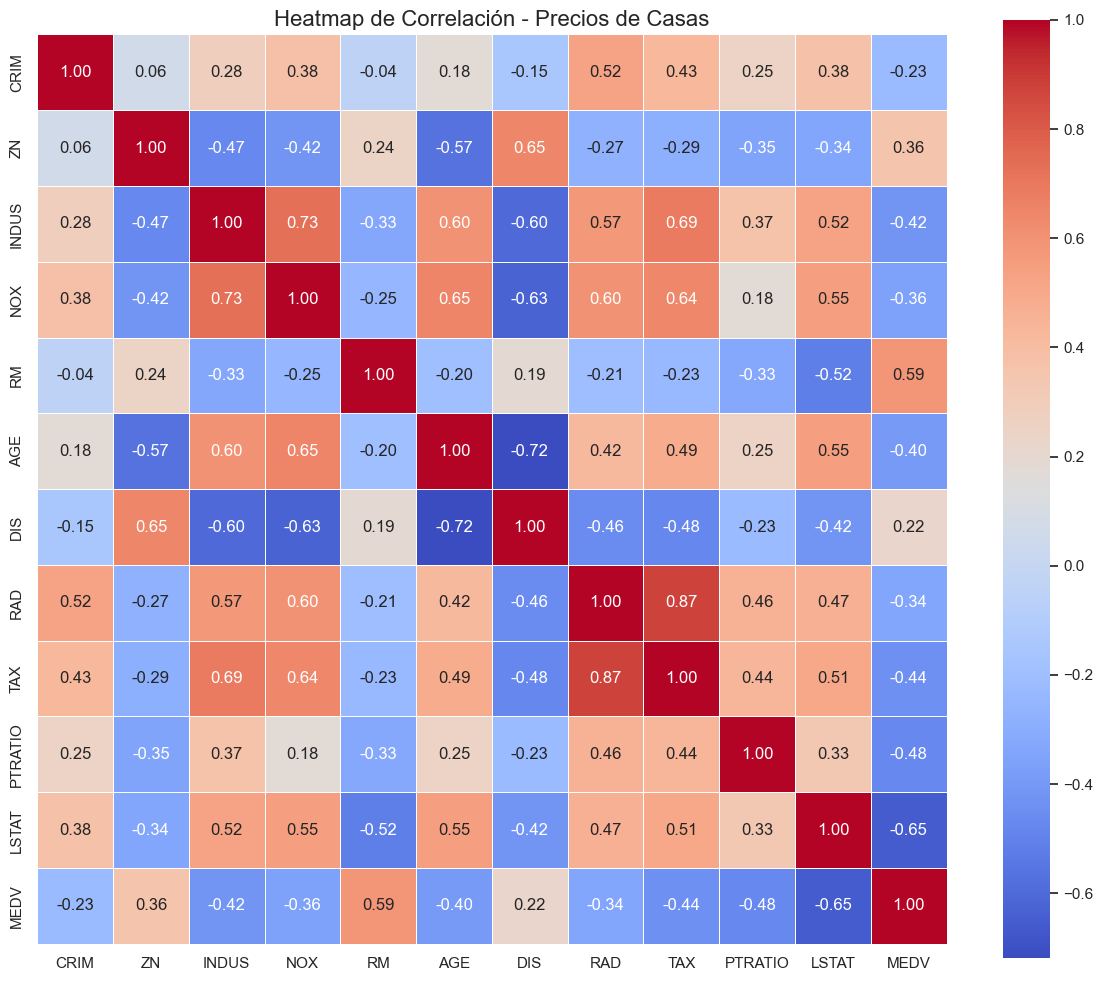

In [37]:
# Seleccionar algunas variables numéricas para el heatmap
variables = ['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'LSTAT', 'MEDV']
df_subset = df[variables]

# Calcular la correlación entre las variables
correlation = df_subset.corr()

sns.set_theme()

# Crear el heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f', square=True)

# Configurar el título y los labels
plt.title('Heatmap de Correlación - Precios de Casas', fontsize=16)
plt.tight_layout()

# Mostrar el gráfico
plt.show()

#### Análisis de correlaciones altas en el heatmap de precios de casas

##### Correlaciones altas identificadas (≥ 0.70):

1. **INDUS y NOX** (0.73):
   - Existe una fuerte correlación positiva entre la proporción de acres de negocios no minoristas por ciudad (INDUS) y la concentración de óxidos nítricos (NOX).
   - Esto sugiere que las áreas con mayor actividad industrial tienden a tener niveles más altos de contaminación por óxidos nítricos.

2. **AGE y DIS** (-0.72):
   - Hay una fuerte correlación negativa entre la proporción de unidades ocupadas por sus propietarios construidas antes de 1940 (AGE) y la distancia ponderada a los cinco centros de empleo de Boston (DIS).
   - Esto indica que las viviendas más antiguas tienden a estar más cerca de los centros de empleo, mientras que las más nuevas están generalmente más alejadas.

3. **RAD y TAX** (0.87):
   - Se observa una correlación positiva muy fuerte entre el índice de accesibilidad a las autopistas radiales (RAD) y la tasa de impuesto a la propiedad por $10,000 (TAX).
   - Esto sugiere que las áreas con mejor acceso a las autopistas tienden a tener tasas de impuestos más altas, posiblemente debido a una mayor demanda o desarrollo en estas zonas.

##### Implicaciones:

- La fuerte relación entre la actividad industrial y la contaminación del aire podría ser relevante para políticas de zonificación y regulaciones ambientales.
- La correlación entre la edad de las viviendas y su proximidad a los centros de empleo puede influir en estrategias de desarrollo urbano y planificación de transporte.
- La asociación entre el acceso a autopistas y las tasas de impuestos podría ser considerada en la planificación fiscal y el desarrollo de infraestructuras.

##### Nota:

Estas correlaciones no implican necesariamente causalidad, pero proporcionan insights valiosos sobre las relaciones entre diferentes características del mercado inmobiliario y factores urbanos en el área de Boston.

### CRIM

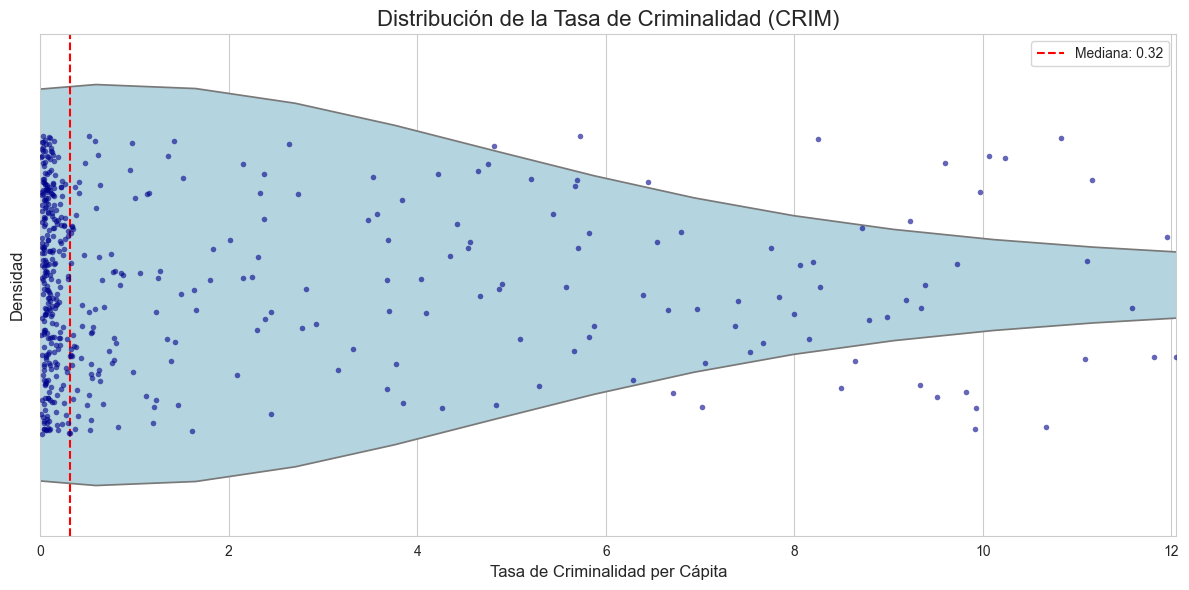

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar los datos (asumiendo que ya tienes el DataFrame 'df')
# Si no, descomenta la siguiente línea:
# df = pd.read_csv("house-prices-tp.csv")

# Configurar el estilo de seaborn
sns.set_style("whitegrid")

# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(12, 6))

# Crear el gráfico de violín
sns.violinplot(x=df['CRIM'], ax=ax, color="lightblue", inner=None)

# Superponer el gráfico de densidad de puntos
sns.stripplot(x=df['CRIM'], ax=ax, color="darkblue", alpha=0.6, jitter=0.3, size=4)

# Configurar el título y las etiquetas
plt.title('Distribución de la Tasa de Criminalidad (CRIM)', fontsize=16)
plt.xlabel('Tasa de Criminalidad per Cápita', fontsize=12)
plt.ylabel('Densidad', fontsize=12)

# Ajustar los límites del eje x para mejorar la visualización
q1, q3 = df['CRIM'].quantile([0.25, 0.75])
iqr = q3 - q1
lower_bound = max(0, q1 - 1.5 * iqr)
upper_bound = q3 + 1.5 * iqr
plt.xlim(lower_bound, upper_bound)

# Añadir una línea vertical para la mediana
median = df['CRIM'].median()
plt.axvline(x=median, color='red', linestyle='--', label=f'Mediana: {median:.2f}')

# Añadir leyenda
plt.legend()

# Mostrar el gráfico
plt.tight_layout()
plt.show()

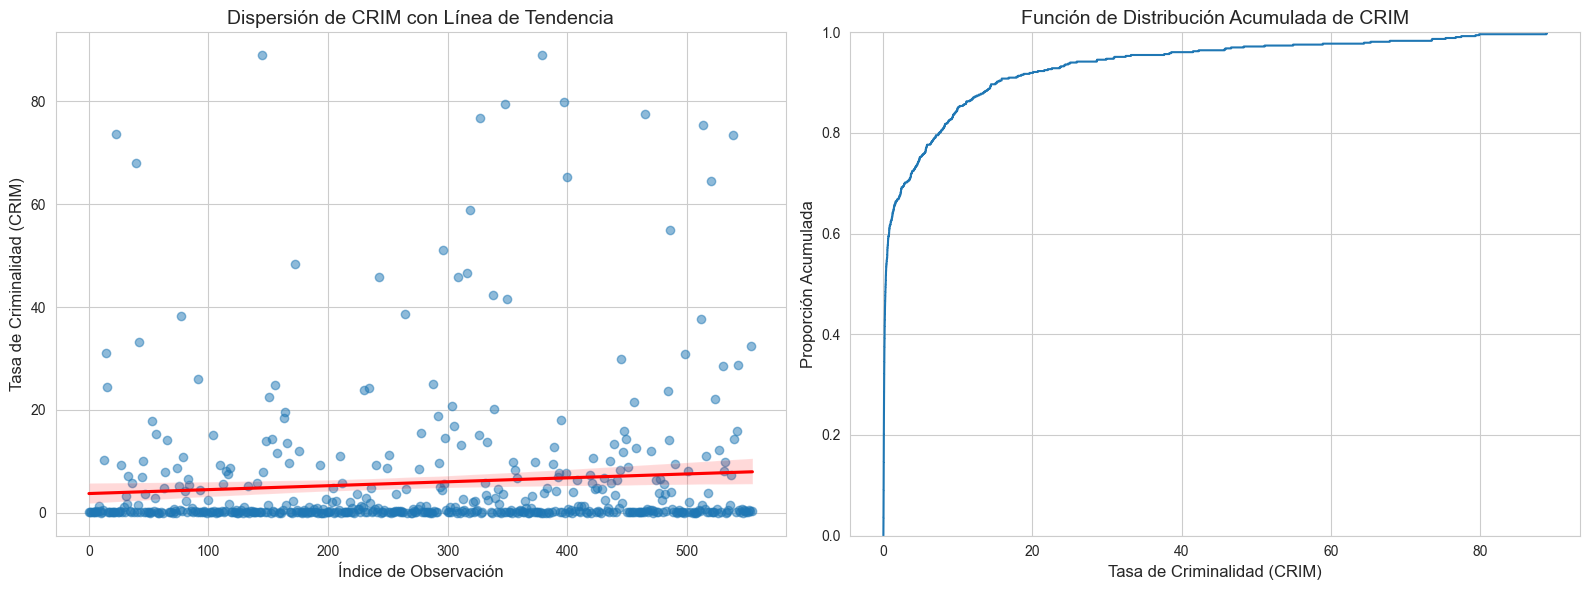

Estadísticas descriptivas de CRIM:
count    533.000000
mean       5.845517
std       13.828631
min        0.006320
25%        0.084470
50%        0.315330
75%        4.871410
max       88.976200
Name: CRIM, dtype: float64

P-valor del test de normalidad: nan
No hay evidencia suficiente para rechazar la normalidad de CRIM (p >= 0.05)


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

# Cargar los datos (asumiendo que ya tienes el DataFrame 'df')
# Si no, descomenta la siguiente línea:
# df = pd.read_csv("house-prices-tp.csv")

# Configurar el estilo de seaborn
sns.set_style("whitegrid")

# Crear una figura con dos subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# 1. Gráfico de dispersión con línea de tendencia
sns.regplot(x=df.index, y='CRIM', data=df, ax=ax1, scatter_kws={'alpha':0.5}, line_kws={'color': 'red'})
ax1.set_title('Dispersión de CRIM con Línea de Tendencia', fontsize=14)
ax1.set_xlabel('Índice de Observación', fontsize=12)
ax1.set_ylabel('Tasa de Criminalidad (CRIM)', fontsize=12)

# 2. Gráfico de densidad acumulada
sns.ecdfplot(data=df, x='CRIM', ax=ax2)
ax2.set_title('Función de Distribución Acumulada de CRIM', fontsize=14)
ax2.set_xlabel('Tasa de Criminalidad (CRIM)', fontsize=12)
ax2.set_ylabel('Proporción Acumulada', fontsize=12)

# Ajustar el diseño y mostrar los gráficos
plt.tight_layout()
plt.show()

# Estadísticas descriptivas adicionales
print("Estadísticas descriptivas de CRIM:")
print(df['CRIM'].describe())

# Prueba de normalidad
_, p_value = stats.normaltest(df['CRIM'])
print(f"\nP-valor del test de normalidad: {p_value:.4f}")
if p_value < 0.05:
    print("La distribución de CRIM no parece ser normal (p < 0.05)")
else:
    print("No hay evidencia suficiente para rechazar la normalidad de CRIM (p >= 0.05)")

C:\Users\src4\AppData\Local\Temp\ipykernel_25436\74529830.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='CRIM', y=top_10_crim.index, data=top_10_crim, ax=ax1, palette='viridis')


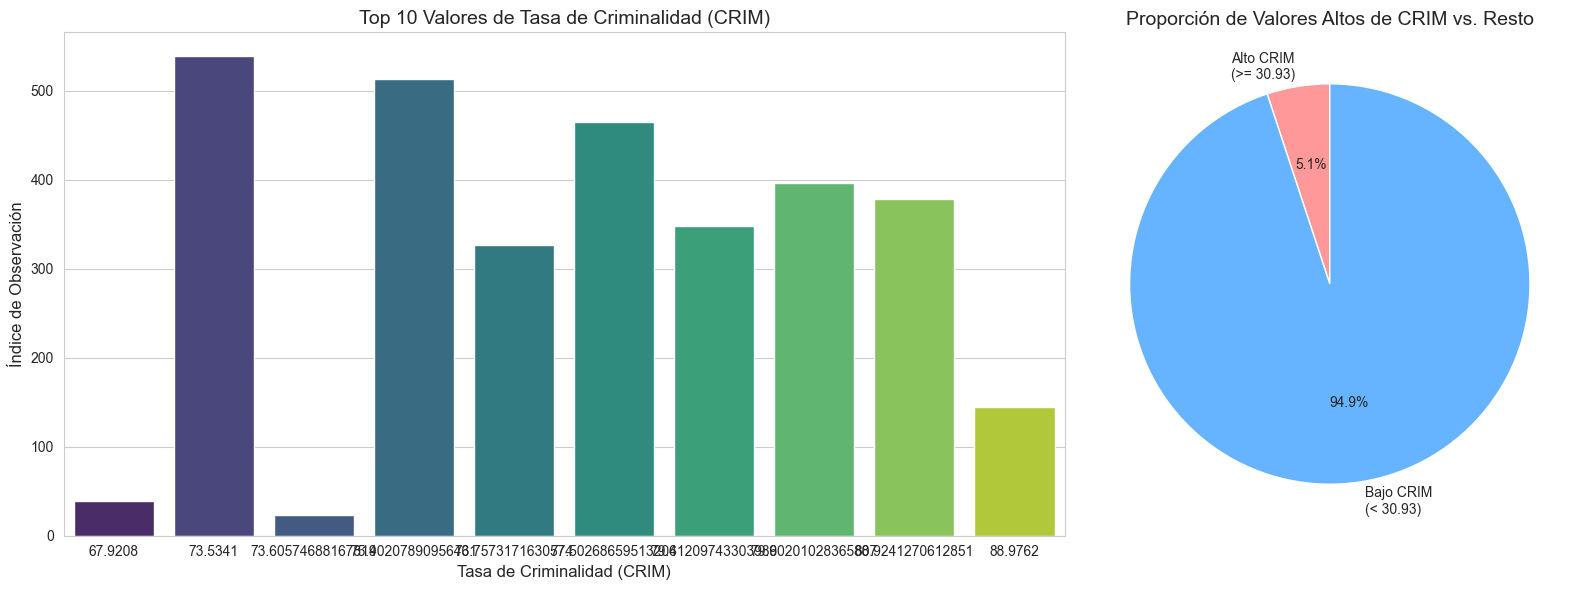

Número total de observaciones: 556
Número de observaciones con CRIM alto (>= 30.93): 27
Valor máximo de CRIM: 88.98
Valor mínimo de CRIM: 0.01
Media de CRIM: 5.85
Mediana de CRIM: 0.32


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar los datos (asumiendo que ya tienes el DataFrame 'df')
# Si no, descomenta la siguiente línea:
# df = pd.read_csv("house-prices-tp.csv")

# Configurar el estilo de seaborn
sns.set_style("whitegrid")

# Crear una figura con dos subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6), gridspec_kw={'width_ratios': [2, 1]})

# 1. Gráfico de barras de los top 10 valores de CRIM
top_10_crim = df.nlargest(10, 'CRIM')
sns.barplot(x='CRIM', y=top_10_crim.index, data=top_10_crim, ax=ax1, palette='viridis')
ax1.set_title('Top 10 Valores de Tasa de Criminalidad (CRIM)', fontsize=14)
ax1.set_xlabel('Tasa de Criminalidad (CRIM)', fontsize=12)
ax1.set_ylabel('Índice de Observación', fontsize=12)

# 2. Gráfico de torta de la proporción de valores altos de CRIM vs. el resto
threshold = df['CRIM'].quantile(0.95)  # Definimos "alto" como el top 5%
high_crim = df[df['CRIM'] >= threshold]
low_crim = df[df['CRIM'] < threshold]

sizes = [len(high_crim), len(low_crim)]
labels = [f'Alto CRIM\n(>= {threshold:.2f})', f'Bajo CRIM\n(< {threshold:.2f})']
colors = ['#ff9999', '#66b3ff']

ax2.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
ax2.set_title('Proporción de Valores Altos de CRIM vs. Resto', fontsize=14)

# Ajustar el diseño y mostrar los gráficos
plt.tight_layout()
plt.show()

# Estadísticas adicionales
print(f"Número total de observaciones: {len(df)}")
print(f"Número de observaciones con CRIM alto (>= {threshold:.2f}): {len(high_crim)}")
print(f"Valor máximo de CRIM: {df['CRIM'].max():.2f}")
print(f"Valor mínimo de CRIM: {df['CRIM'].min():.2f}")
print(f"Media de CRIM: {df['CRIM'].mean():.2f}")
print(f"Mediana de CRIM: {df['CRIM'].median():.2f}")

### ZN

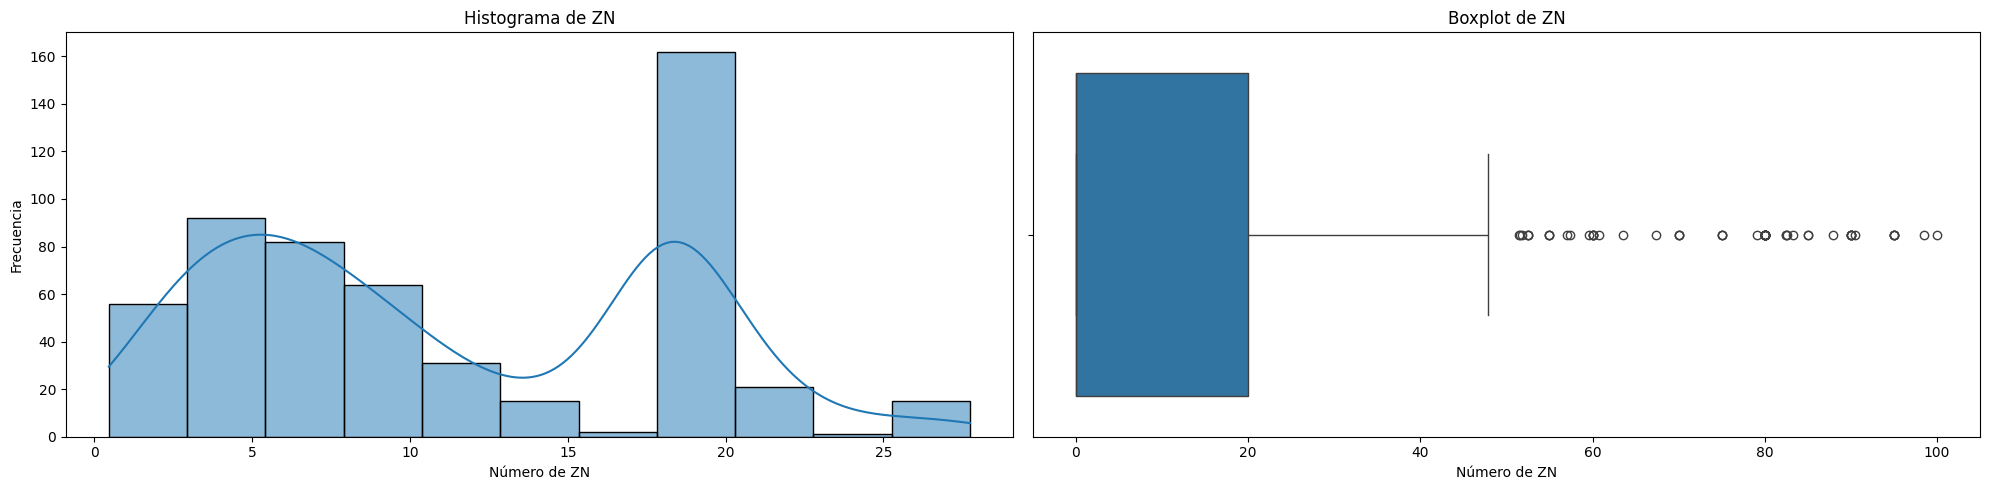

count    541.000000
mean      11.218725
std        6.942021
min        0.460000
25%        5.130000
50%        9.690000
75%       18.100000
max       27.740000
Name: INDUS, dtype: float64

In [6]:
fig, axs = plt.subplots(1, 2, figsize=(20, 5))

# Histograma
sns.histplot(df['INDUS'], kde=True, ax=axs[0])
axs[0].set_title('Histograma de ZN')
axs[0].set_xlabel('Número de ZN')
axs[0].set_ylabel('Frecuencia')

# Calcular cuartiles 
q1 = df['INDUS'].quantile(0.25)
q2 = df['INDUS'].quantile(0.5)
q3 = df['INDUS'].quantile(0.75)

# Boxplot
sns.boxplot(x=df['ZN'], ax=axs[1])
axs[1].set_title('Boxplot de ZN')
axs[1].set_xlabel('Número de ZN')

plt.tight_layout()
plt.show()

df['INDUS'].describe()

### INDUS y NOX

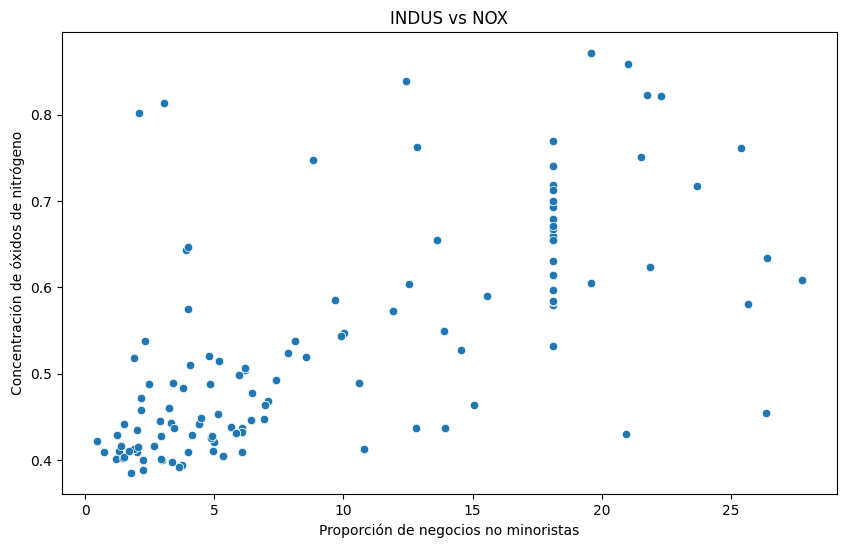

In [3]:
# Gráfico de dispersión 2D para INDUS vs NOX
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='INDUS', y='NOX')
plt.title('INDUS vs NOX')
plt.xlabel('Proporción de negocios no minoristas')
plt.ylabel('Concentración de óxidos de nitrógeno')
plt.show()

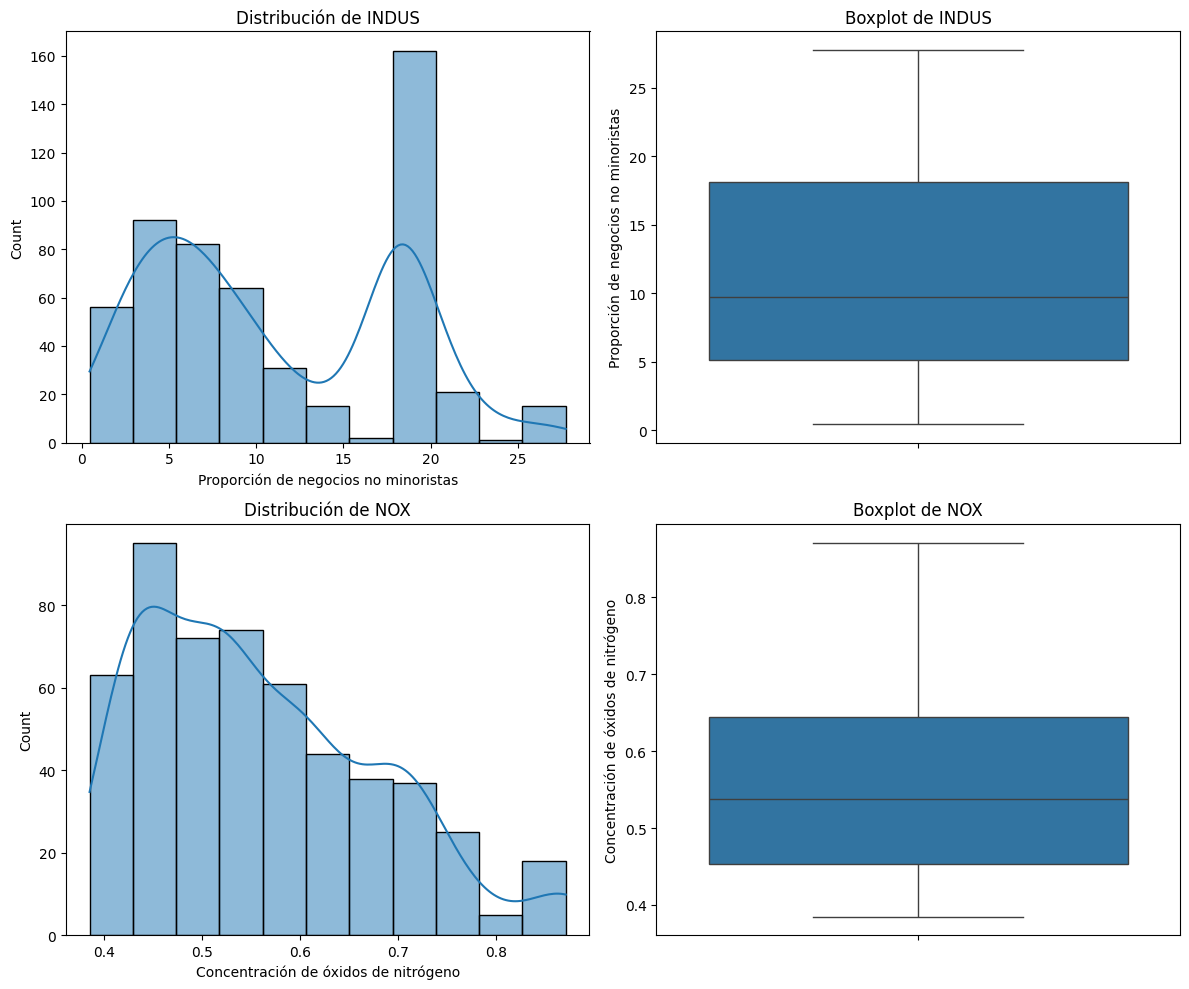

In [4]:
# Crear una figura con 2 filas y 2 columnas
plt.figure(figsize=(12, 10))

# Histograma de INDUS
plt.subplot(2, 2, 1)
sns.histplot(df['INDUS'], kde=True)
plt.title('Distribución de INDUS')
plt.xlabel('Proporción de negocios no minoristas')

# Boxplot de INDUS
plt.subplot(2, 2, 2)
sns.boxplot(y=df['INDUS'])
plt.title('Boxplot de INDUS')
plt.ylabel('Proporción de negocios no minoristas')

# Histograma de NOX
plt.subplot(2, 2, 3)
sns.histplot(df['NOX'], kde=True)
plt.title('Distribución de NOX')
plt.xlabel('Concentración de óxidos de nitrógeno')

# Boxplot de NOX
plt.subplot(2, 2, 4)
sns.boxplot(y=df['NOX'])
plt.title('Boxplot de NOX')
plt.ylabel('Concentración de óxidos de nitrógeno')

plt.tight_layout()
plt.show()

In [5]:
# 1. Gráfico de dispersión 3D
fig = px.scatter_3d(df, x='INDUS', y='NOX', z='MEDV', color='MEDV',
                    title='Relación entre INDUS, NOX contra MEDV',
                    labels={'MEDV': 'Valor mediano de las viviendas', 
                            'INDUS': 'Negocios no minoristas',
                            'NOX': 'Concentración de óxidos de nitrógeno'})
fig.show()

### CHAS

### RM

### AGE y DIS

### RAD y TAX

### PTRATIO

### B

### LSTAT

### MEDV

# Split de datos

In [18]:
X = df.drop(columns=['MEDV'])
y = df["MEDV"]

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)